# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)
data.shape

(6497, 13)

# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [4]:
data.groupby(['type','quality'], axis=0)['quality'].count()

type   quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: quality, dtype: int64

# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


### standardizing features

In [5]:
from sklearn import preprocessing

# Geting column names first
data_features = data[list( data.columns[:-2])]  
names = data_features.columns
# Creating the Scaler object
scaler = preprocessing.StandardScaler()
# Fiting data on the scaler object
scaled_data = scaler.fit_transform(data_features)

scaled_data = pd.DataFrame(scaled_data, columns=names)
scaled_data[['type','quality']]=data[['type','quality']]
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,white,6
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,white,6
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,white,6
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,white,6
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,white,6


### Create a binary target for each type of wine

In [6]:
scaled_data['good quality'] = scaled_data['quality']>5
scaled_data.head()
redWine_data = scaled_data[scaled_data['type'] == 'red']
whiteWine_data = scaled_data[scaled_data['type'] == 'white']

whiteWine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality,good quality
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,white,6,True
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,white,6,True
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,white,6,True
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,white,6,True
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,white,6,True


### Create two Linear SVM's for the white and red wines, repectively.

In [7]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')

features = list(whiteWine_data.columns[:-3])
clf.fit(whiteWine_data[features], whiteWine_data['good quality'])
clf.fit(redWine_data[features], redWine_data['good quality'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


In [8]:
from sklearn.model_selection import train_test_split
X_w = whiteWine_data[features]
y_w = whiteWine_data['good quality']
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_w, y_w, test_size=0.3, random_state=42)

In [9]:
kernels = ('poly','rbf','sigmoid')

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(Xw_train, yw_train)
    yw_predict = clf.predict(Xw_test)
    print('Accuracy of SVM classifier using ' + kernel + ' kernel on test set: {:.3f}'.format(clf.score(Xw_test, yw_test)))

Accuracy of SVM classifier using poly kernel on test set: 0.749
Accuracy of SVM classifier using rbf kernel on test set: 0.784
Accuracy of SVM classifier using sigmoid kernel on test set: 0.652


In [10]:
X_r = redWine_data[features]
y_r = redWine_data['good quality']
y_true = redWine_data['good quality']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, test_size=0.3, random_state=42)

In [11]:
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(Xr_train, yr_train)
    yr_predict = clf.predict(Xr_test)
    print('Accuracy of SVM classifier using ' + kernel + ' kernel on test set: {:.3f}'.format(clf.score(Xr_test, yr_test)))

Accuracy of SVM classifier using poly kernel on test set: 0.756
Accuracy of SVM classifier using rbf kernel on test set: 0.740
Accuracy of SVM classifier using sigmoid kernel on test set: 0.585


# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [12]:
# prueba de parametros del Kernel rbf para el Dataset de vinos blancos
C_p = [0.1, 1, 100, 100, 1000]
gamma_p = [0.01,0.001,0.0001]
bestScore = 0.0

for eachC_p in C_p:
    for eachGamma in gamma_p:
        clf = SVC(kernel='rbf', C = eachC_p, gamma = eachGamma)
        clf.fit(Xw_train, yw_train)
        yw_predict = clf.predict(Xw_test)
        modelScore = clf.score(Xw_test, yw_test)
        if  bestScore < modelScore:
            bestScore = modelScore

print ("Best score is  " + str(bestScore) + " whith  gamma = " + str(eachGamma) + " and C = " + str(eachC_p) )           


Best score is  0.7789115646258503 whith  gamma = 0.0001 and C = 1000


In [13]:
# prueba de parametros del Kernel rbf para el Dataset de vinos rojos
bestScore = 0.0
for eachC_p in C_p:
    for eachGamma in gamma_p:
        clf = SVC(kernel='rbf', C = eachC_p, gamma = eachGamma)
        clf.fit(Xr_train, yr_train)
        yr_predict = clf.predict(Xr_test)
        modelScore = clf.score(Xr_test, yr_test)
        if  bestScore < modelScore:
            bestScore = modelScore

print ("Best score is  " + str(bestScore) + " whith  gamma = " + str(eachGamma) + " and C = " + str(eachC_p) )

Best score is  0.7604166666666666 whith  gamma = 0.0001 and C = 1000


# Exercise 6.5

Compare the results with other methods

In [14]:
# Using logistic regression to compare
# white wine dataset
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(Xw_train, yw_train)
logreg.predict(Xw_test)
logreg.score(Xw_test, yw_test)

0.7537414965986394

In [15]:
# red wine dataset
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(Xr_train, yr_train)
logreg.predict(Xr_test)
logreg.score(Xr_test, yr_test)

0.7354166666666667

Al comparar el accurancy del modelo SVC con kernel rbf y parámetros gamma = 0.0001 y C = 1000 vs. el modelo logit se evidencia que el modelo SVC tiene mejor accurancy.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

### Train a linear regression to predict wine quality (Continous)

In [16]:
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
y = data['quality']
clf1.fit(data[features], y)
data['predicted_quality']= clf1.predict(data[features])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,predicted_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,5.556809
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,5.281311
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,5.879632
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,5.697990
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,5.697990


### Analyze the coefficients

In [17]:
coefficients = pd.DataFrame({"Feature":data[features].columns,"Coefficients":np.transpose(clf1.coef_)})
coefficients

,Feature,Coefficients
0,fixed acidity,0.067684
1,volatile acidity,-1.327892
2,citric acid,-0.109657
3,residual sugar,0.043559
4,chlorides,-0.483714
5,free sulfur dioxide,0.005970
6,total sulfur dioxide,-0.002481
7,density,-54.966942
8,pH,0.439296
9,sulphates,0.768252


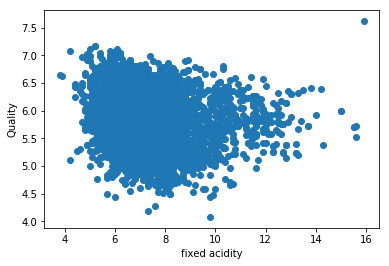

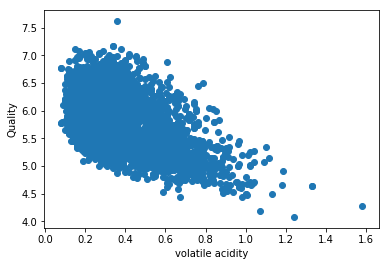

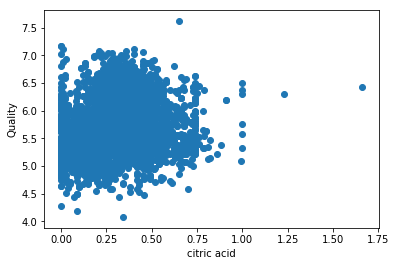

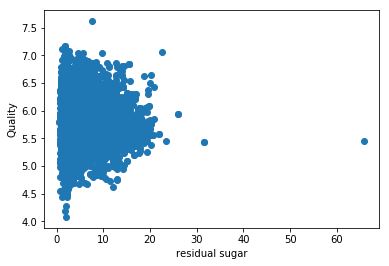

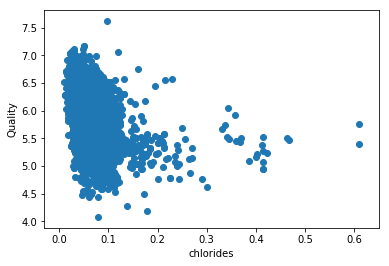

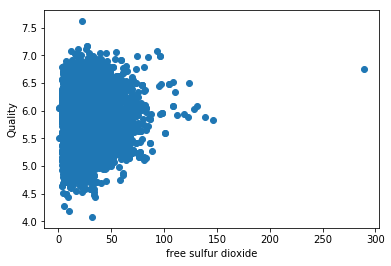

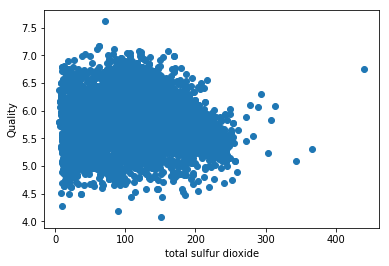

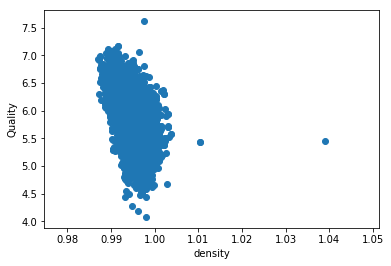

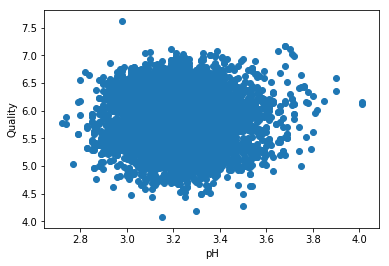

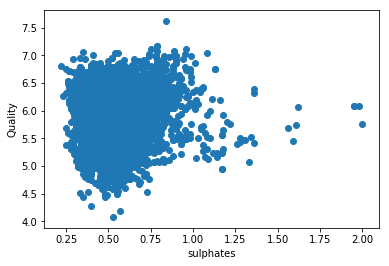

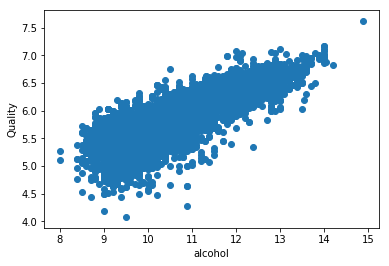

In [32]:
import matplotlib.pyplot as plt
# scatter plot
for eachFeature in features:
    plt.scatter(data[eachFeature], data['predicted_quality'])
    plt.xlabel(eachFeature)
    plt.ylabel('Quality')
    plt.show()



Los coeficientes donde se evidencia una mayor relacion lineal son el alcohol y volatile acidity. El primero con una relación positiva mientras que el segundo presenta una relación negativa, es decir a mayor presencia de volatile acidity menor es la calidad esperada del vino.

### Evaluate the RMSE

In [19]:
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(data['quality'],data['predicted_quality'])))


RMSE: 0.7346532973298834


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [20]:

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.1, normalize=True)

X = data[features]
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7136687372780174


In [21]:
ridgeregCoef =  pd.DataFrame({"Feature":data[features].columns,"Coefficients":np.transpose(ridgereg.coef_)})
ridgeregCoef

,Feature,Coefficients
0,fixed acidity,0.031225
1,volatile acidity,-1.145291
2,citric acid,-0.023335
3,residual sugar,0.026408
4,chlorides,-0.855285
5,free sulfur dioxide,0.005665
6,total sulfur dioxide,-0.002045
7,density,-30.488659
8,pH,0.228246
9,sulphates,0.664082


In [22]:
ridgereg = Ridge(alpha=1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7490467806792411


In [23]:
ridgeregCoef =  pd.DataFrame({"Feature":data[features].columns,"Coefficients":np.transpose(ridgereg.coef_)})
ridgeregCoef

,Feature,Coefficients
0,fixed acidity,0.000563
1,volatile acidity,-0.570656
2,citric acid,0.147556
3,residual sugar,0.005534
4,chlorides,-1.228643
5,free sulfur dioxide,0.001949
6,total sulfur dioxide,-0.000645
7,density,-23.587802
8,pH,0.075521
9,sulphates,0.305248


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [24]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print('RMSE: '  + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
lassoregCoef =  pd.DataFrame({"Feature":data[features].columns,"Coefficients":np.transpose(lassoreg.coef_)})
lassoregCoef

RMSE: 0.8544995469531623


,Feature,Coefficients
0,fixed acidity,-0.0
1,volatile acidity,-0.0
2,citric acid,0.0
3,residual sugar,-0.0
4,chlorides,-0.0
5,free sulfur dioxide,0.0
6,total sulfur dioxide,-0.0
7,density,-0.0
8,pH,0.0
9,sulphates,0.0


In [25]:
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print('RMSE: '  + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
lassoregCoef =  pd.DataFrame({"Feature":data[features].columns,"Coefficients":np.transpose(lassoreg.coef_)})
lassoregCoef

RMSE: 0.7320646377632174


,Feature,Coefficients
0,fixed acidity,-0.000000
1,volatile acidity,-0.897993
2,citric acid,0.000000
3,residual sugar,0.000000
4,chlorides,-0.000000
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,-0.000000
7,density,-0.000000
8,pH,0.000000
9,sulphates,0.045983


# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

In [26]:
data['good quality'] = data['quality'] > 5
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,predicted_quality,good quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,5.556809,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,5.281311,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,5.879632,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,5.697990,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,5.697990,True


In [27]:
X = data[features]
y = data['good quality']

logreg = LogisticRegression(solver='liblinear',C=1e9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)


0.7451282051282051

In [28]:
logreg.coef_

array([[ 0.03078197, -4.42230408, -0.67964641,  0.06462061, -1.07598512,
         0.01967415, -0.0081373 , -4.7806563 ,  0.41875682,  2.00167286,
         0.90018831]])

In [29]:
from sklearn.metrics import f1_score
 
f1_score(y_test, y_pred, average='weighted') 

0.7410055564526908

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [30]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
coefs = [0.01,0.1,1]
penalty = ['l1','l2']
logitData=[]
for c in coefs:
    for eachPenalty in penalty:
        logreg = LogisticRegression(C=c, penalty=eachPenalty,solver='liblinear')
        logreg.fit(X_train_scaled, y_train)
        y_predict = logreg.predict(X_test_scaled)
        f1score = f1_score(y_test, y_predict, average='weighted')
        logitData.append([logreg.coef_, f1score,c,eachPenalty])

logitData = pd.DataFrame(logitData,columns=['Coef', 'F1 Score','C','Penalty'])
logitData

,Coef,F1 Score,C,Penalty
0,"[[0.0, -0.47074027276253627, 0.0, 0.0220163160...",0.707390,0.01,l1
1,"[[0.0702252638816463, -0.5566901563803351, -0....",0.713560,0.01,l2
2,"[[0.002456150911997515, -0.7004224275384837, -...",0.715221,0.10,l1
3,"[[0.10237189860954875, -0.69883235812241, -0.0...",0.714287,0.10,l2
4,"[[0.08335851106480648, -0.7247595764537623, -0...",0.715221,1.00,l1
5,"[[0.10471634125903427, -0.7210327812674658, -0...",0.714805,1.00,l2
